<a href="https://colab.research.google.com/github/Hemant9785/deep-learning-/blob/main/mosquito_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# Import library
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates
from keras import optimizers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from numpy import savetxt
import seaborn as sns

In [40]:
data = pd.read_excel('/content/Mosquito_EXP.xlsx')
data.iloc[0:5]

,MQ2,MQ3,MQ4,MQ7,MQ9,MQ135,MQ6,MQ8,Temp,Humidity,Gas
0,31,88,65,96,65,96,88,31,31.4,45.8,Fresh Air
1,40,159,210,176,213,176,158,40,31.4,45.7,Fresh Air
2,41,185,355,223,357,223,183,41,31.4,45.6,Fresh Air
3,41,192,459,249,460,249,189,41,31.5,45.7,Fresh Air
4,41,196,516,266,518,265,194,41,31.5,44.5,Fresh Air


In [59]:
labels = data['Gas'].unique()
labels

array(['Fresh Air', 'Coil', 'Incense Sticks', 'Fast Card', 'Hit',
       'Liquid', 'EGG TRAY'], dtype=object)

In [60]:
from sklearn.preprocessing import LabelEncoder
ohe = LabelEncoder()

In [65]:
Y = ohe.fit_transform(data['Gas'])
Y

array([3, 3, 3, ..., 1, 1, 1])

In [64]:
# Y = Y.toarray()


AttributeError: ignored

In [66]:
data_ = data.drop(['Gas'],axis=1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(data_)

In [67]:
X1 = []
for i in range(X.shape[0]):
  arr = X[i]
  arr = np.array(arr)
  arr = np.reshape(arr,(5,2))
  X1.append(arr)
# X1[0:5]
# X1.shape
X = np.array(X1)
X.shape

(1678, 5, 2)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.05, random_state=0)

# X_train.reshape((1594,10,1))
X_train.shape,y_train.shape

((1594, 5, 2), (1594,))

(1594, 5, 2)

In [86]:
import tensorflow as tf
model_cnn = tf.keras.Sequential()
model_cnn.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_cnn.add(tf.keras.layers.Dropout(
    rate=0.1
)
 )
model_cnn.add(tf.keras.layers.MaxPooling1D(pool_size=1))
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(50))
model_cnn.add(tf.keras.layers.Dense(units=7,activation='softmax'))
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


In [88]:
history = model_cnn.fit(X_train, y_train,  epochs=100, batch_size = 32)

Epoch 1/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2260 - accuracy: 0.8946
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2240 - accuracy: 0.8934
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2235 - accuracy: 0.8871
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2178 - accuracy: 0.9015
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2257 - accuracy: 0.8952
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2151 - accuracy: 0.8971
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2115 - accuracy: 0.8934
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2204 - accuracy: 0.8934
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.8908
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2102 - accuracy: 0.9059
Epoch 11/

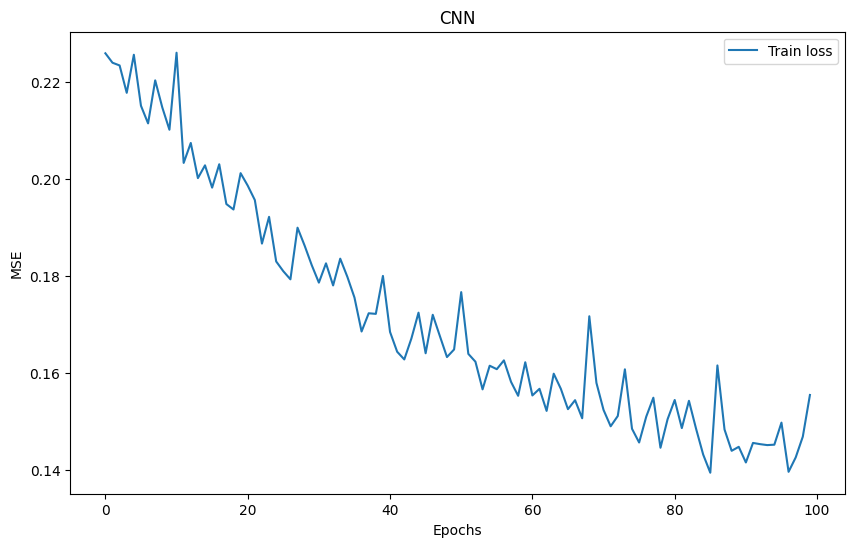

<Figure size 640x480 with 0 Axes>

In [89]:
plt.figure(figsize=(10,6))  
plt.plot(history.history['loss'], label='Train loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("CNN")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()
plt.savefig('graph_CNN.png')

In [90]:

# y_test = [np.argmax(i) for i in y_test]
y_pred = model_cnn.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
y_pred[0]

3/3 [==============================] - 0s 6ms/step


4

Text(95.72222222222221, 0.5, 'Truth')

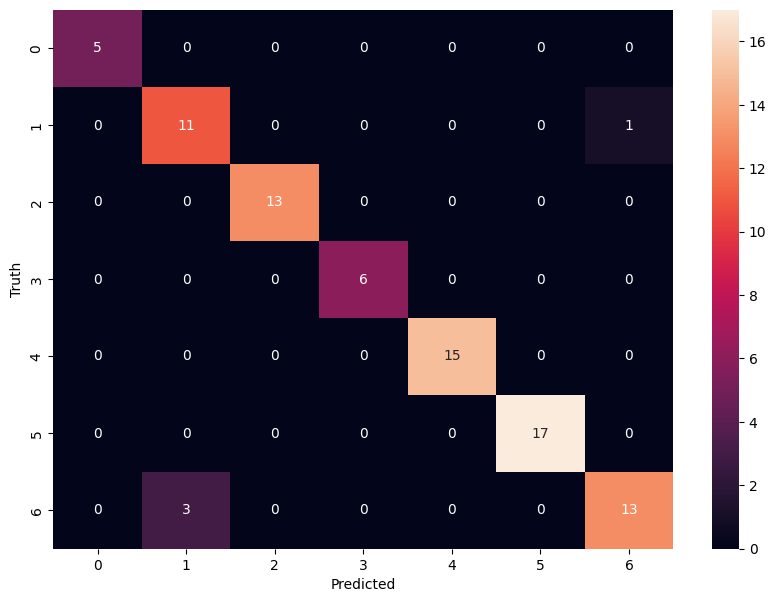

In [91]:
# confusion matrix
import matplotlib.pyplot as plt

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [100]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='micro')
# (0.33..., 0.33..., 0.33..., None)

(0.9523809523809523, 0.9523809523809523, 0.9523809523809523, None)

In [110]:
score = model_cnn.evaluate(X_test, y_test, verbose=False) 
model_cnn.metrics_names
print('Test score: Loss ', score[0])    #Loss on test
print('Test accuracy: ', score[1])

Test score: Loss  0.13945165276527405
Test accuracy:  0.9523809552192688
